In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline  as pyo
import datetime as dt
import ipywidgets as widgest
from IPython.display import display 
from ipywidgets import interact, interact_manual
import pandas.plotting as pp
from pandas.plotting import autocorrelation_plot
#import lazypredict
from sklearn.utils import deprecated
import datetime


# from sklearn.utils._testing import ignore_warnings

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split

In [19]:
import warnings
warnings.filterwarnings('ignore')


In [20]:
import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import lognorm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.arima_model import ARIMA

#from arch import arch_model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape)

In [22]:
import random
from collections import deque
from sklearn import preprocessing

In [23]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [24]:
start = dt.datetime(2020,1,1)
end =dt.datetime.now()
interval = '1d'

coins = ['ADA-USD',
 'ALGO-USD',
 'ANKR-USD',
 'ATOM-USD',
 'BAT-USD',
 'BCH-USD',
 'BNB-USD',
 'CHZ-USD',
 'CRO-USD',
 'DASH-USD',
 'DCR-USD',
 'DOGE-USD',
 'ENJ-USD',
 'EOS-USD',
 'ETC-USD',
 'FIL-USD',
 'FTM-USD',
 'FTT-USD',
 'HBAR-USD',
 'KAVA-USD',
 'LINK-USD',
 'LRC-USD',
 'LTC-USD',
 'MANA-USD',
 'MIOTA-USD',
 'MKR-USD',
 'NEO-USD',
 'RUNE-USD',
 'RVN-USD',
 'SNX-USD',
 'THETA-USD',
 'TRX-USD',
 'TUSD-USD',
 'VET-USD',
 'XEM-USD',
 'XLM-USD',
 'XMR-USD',
 'XRP-USD',
 'ZEC-USD']
df = yf.download(coins, start =start, end =end, interval = interval)

  

[*********************100%***********************]  39 of 39 completed


In [25]:
df

Adj Close                                                       \
             ADA-USD  ALGO-USD  ANKR-USD   ATOM-USD   BAT-USD     BCH-USD   
Date                                                                        
2020-01-01  0.033458  0.219938  0.001446   4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397   4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416   4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430   4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418   4.231877  0.188898  224.096527   
...              ...       ...       ...        ...       ...         ...   
2023-04-14  0.438330  0.227652  0.036314  12.262309  0.286126  132.494904   
2023-04-15  0.453280  0.232241  0.037160  12.394587  0.285833  132.805786   
2023-04-16  0.451755  0.234859  0.037015  12.697115  0.288967  134.453751   
2023-04-17  0.434167  0.220693  0.036002  12.341851  0.278806  131.615753   
2023-04-18  0.437954  0.219850  0.036813  12.437926  0.279735  132.076385   

                                                       ...    Volume  \
               BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...   SNX-USD   
Date                                                   ...             
2020-01-01   13.689083  0.006654  0.033973  41.865791  ...    209892   
2020-01-02   13.027011  0.006654  0.032858  40.223259  ...    131145   
2020-01-03   13.660452  0.007224  0.034666  44.021961  ...    181096   
2020-01-04   13.891512  0.007601  0.034689  46.451866  ...    136517   
2020-01-05   14.111019  0.007661  0.034618  51.479233  ...    116869   
...                ...       ...       ...        ...  ...       ...   
2023-04-14  329.173859  0.134127  0.070591  60.007286  ...  68781294   
2023-04-15  333.407288  0.133416  0.071222  59.756329  ...  49972744   
2023-04-16  348.220917  0.138526  0.072558  61.049778  ...  50692868   
2023-04-17  339.994110  0.135578  0.069947  58.456722  ...  41769055   
2023-04-18  341.808136  0.135561  0.071929  59.675323  ...  72162384   

                                                                             \
           THETA-USD     TRX-USD    TUSD-USD   VET-USD   XEM-USD    XLM-USD   
Date                                                                          
2020-01-01    861040   977215885    99919327  64586744   5041453  168402204   
2020-01-02   1669286   999867628   198862654  59081069   5253256  151848963   
2020-01-03   1512212  1109470187   284264910  66999698   5138719  168931018   
2020-01-04   3118571   991868126   194825762  60583439   8757789  152253766   
2020-01-05   2542730  1079591214   161417973  60517803   4489886  165956087   
...              ...         ...         ...       ...       ...        ...   
2023-04-14  25414950   249121640  1779093662  59591022  12506968   88879571   
2023-04-15  17972704   160719155   985280749  39274480   9385899   44548088   
2023-04-16  19109325   138908766  1115572735  51272488  10440574   46503020   
2023-04-17  17249971   186846117  1541886997  48165105  11465848   52147828   
2023-04-18  52176312   181299760  1722198784  53279044   9906876   48427996   

                                              
              XMR-USD     XRP-USD    ZEC-USD  
Date                                          
2020-01-01   75903149  1041134003   90796167  
2020-01-02   81645163  1085351426  100451732  
2020-01-03  145826653  1270017043  155103806  
2020-01-04   61952234   999331594  114198262  
2020-01-05   51316114  1168067557  151498329  
...               ...         ...        ...  
2023-04-14   86220196  1597156518   42411711  
2023-04-15   76583604   670556486   35704606  
2023-04-16   57557331   631212313   23819059  
2023-04-17   80486639  1021376248   25134464  
2023-04-18   72150024  1016735360   24524148  

[1204 rows x 234 columns]

## создадим функцию которая добавляет индикаторы для монеты

In [26]:
def get_technical_indicators(data, column):
    data['MA7', column] = data['Adj Close', column].rolling(window=7).mean()
    data.loc[data['MA7', column].isna(), ('MA7', column)] = data.loc[data['MA7', column].isna(), ('Adj Close', column)]
    
    data['MA21', column] = data['Adj Close', column].rolling(window=21).mean()
    data.loc[data['MA21', column].isna(), ('MA21', column)] = data.loc[data['MA21', column].isna(), ('Adj Close', column)]
    
    data['MACD', column] = data['Adj Close', column].ewm(span=26).mean() - data['Adj Close', column].ewm(span=12,adjust=False).mean()
    data.loc[data['MACD', column].isna(), ('MACD', column)] = data.loc[data['MACD', column].isna(), ('Adj Close', column)]
    
    data['20SD', column] = data['Adj Close', column].rolling(20).std()
#     data.loc[data['20SD', column].isna(), ('20SD', column)] = data.loc[data['20SD', column].isna(), ('Adj Close', column)].mean()
    
    data['upper_band', column] = data['MA21', column] + (data['20SD', column] * 2)
    data['lower_band', column] = data['MA21', column] - (data['20SD', column] * 2)

    data['EMA', column] = data['Adj Close', column].ewm(com=0.5).mean()
    data.loc[data['EMA', column].isna(), ('EMA', column)] = data.loc[data['EMA', column].isna(), ('Adj Close', column)]
    
    data['logmomentum', column] = np.log(data['Adj Close', column] + 0.001)

    return data

In [27]:
get_technical_indicators(df, 'ADA-USD').head()

Adj Close                                                      \
             ADA-USD  ALGO-USD  ANKR-USD  ATOM-USD   BAT-USD     BCH-USD   
Date                                                                       
2020-01-01  0.033458  0.219938  0.001446  4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397  4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416  4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430  4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418  4.231877  0.188898  224.096527   

                                                      ...      Volume  \
              BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...     XRP-USD   
Date                                                  ...               
2020-01-01  13.689083  0.006654  0.033973  41.865791  ...  1041134003   
2020-01-02  13.027011  0.006654  0.032858  40.223259  ...  1085351426   
2020-01-03  13.660452  0.007224  0.034666  44.021961  ...  1270017043   
2020-01-04  13.891512  0.007601  0.034689  46.451866  ...   999331594   
2020-01-05  14.111019  0.007661  0.034618  51.479233  ...  1168067557   

                            MA7      MA21      MACD    20SD upper_band  \
              ZEC-USD   ADA-USD   ADA-USD   ADA-USD ADA-USD    ADA-USD   
Date                                                                     
2020-01-01   90796167  0.033458  0.033458  0.000000     NaN        NaN   
2020-01-02  100451732  0.032751  0.032751 -0.000258     NaN        NaN   
2020-01-03  155103806  0.034180  0.034180  0.000005     NaN        NaN   
2020-01-04  114198262  0.034595  0.034595  0.000144     NaN        NaN   
2020-01-05  151498329  0.034721  0.034721  0.000194     NaN        NaN   

           lower_band       EMA logmomentum  
              ADA-USD   ADA-USD     ADA-USD  
Date                                         
2020-01-01        NaN  0.033458   -3.368014  
2020-01-02        NaN  0.032928   -3.388745  
2020-01-03        NaN  0.033795   -3.347278  
2020-01-04        NaN  0.034335   -3.335550  
2020-01-05        NaN  0.034593   -3.332017  

[5 rows x 242 columns]

In [28]:
# Видим как алгоритм добавления сработал для одной монеты, 
# теперь добавим колонки с индиакторами для всех монет. Будем делать это в цикле

for coin in df['Adj Close'].columns:
    df = get_technical_indicators(df, coin).copy()

In [29]:
df.head()

Adj Close                                                      \
             ADA-USD  ALGO-USD  ANKR-USD  ATOM-USD   BAT-USD     BCH-USD   
Date                                                                       
2020-01-01  0.033458  0.219938  0.001446  4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397  4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416  4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430  4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418  4.231877  0.188898  224.096527   

                                                      ...       EMA  \
              BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...   XRP-USD   
Date                                                  ...             
2020-01-01  13.689083  0.006654  0.033973  41.865791  ...  0.192667   
2020-01-02  13.027011  0.006654  0.032858  40.223259  ...  0.189199   
2020-01-03  13.660452  0.007224  0.034666  44.021961  ...  0.192191   
2020-01-04  13.891512  0.007601  0.034689  46.451866  ...  0.193652   
2020-01-05  14.111019  0.007661  0.034618  51.479233  ...  0.194914   

           logmomentum        MA7       MA21      MACD    20SD upper_band  \
               XRP-USD    ZEC-USD    ZEC-USD   ZEC-USD ZEC-USD    ZEC-USD   
Date                                                                        
2020-01-01   -1.641615  28.050165  28.050165  0.000000     NaN        NaN   
2020-01-02   -1.665781  27.118073  27.118073 -0.340572     NaN        NaN   
2020-01-03   -1.637215  28.618681  28.618681 -0.071949     NaN        NaN   
2020-01-04   -1.632937  30.238680  30.238680  0.227541     NaN        NaN   
2020-01-05   -1.626905  31.021275  31.021275  0.382648     NaN        NaN   

           lower_band        EMA logmomentum  
              ZEC-USD    ZEC-USD     ZEC-USD  
Date                                          
2020-01-01        NaN  28.050165    3.334030  
2020-01-02        NaN  27.351096    3.300237  
2020-01-03        NaN  28.228655    3.354095  
2020-01-04        NaN  29.585422    3.409155  
2020-01-05        NaN  30.546612    3.434705  

[5 rows x 546 columns]

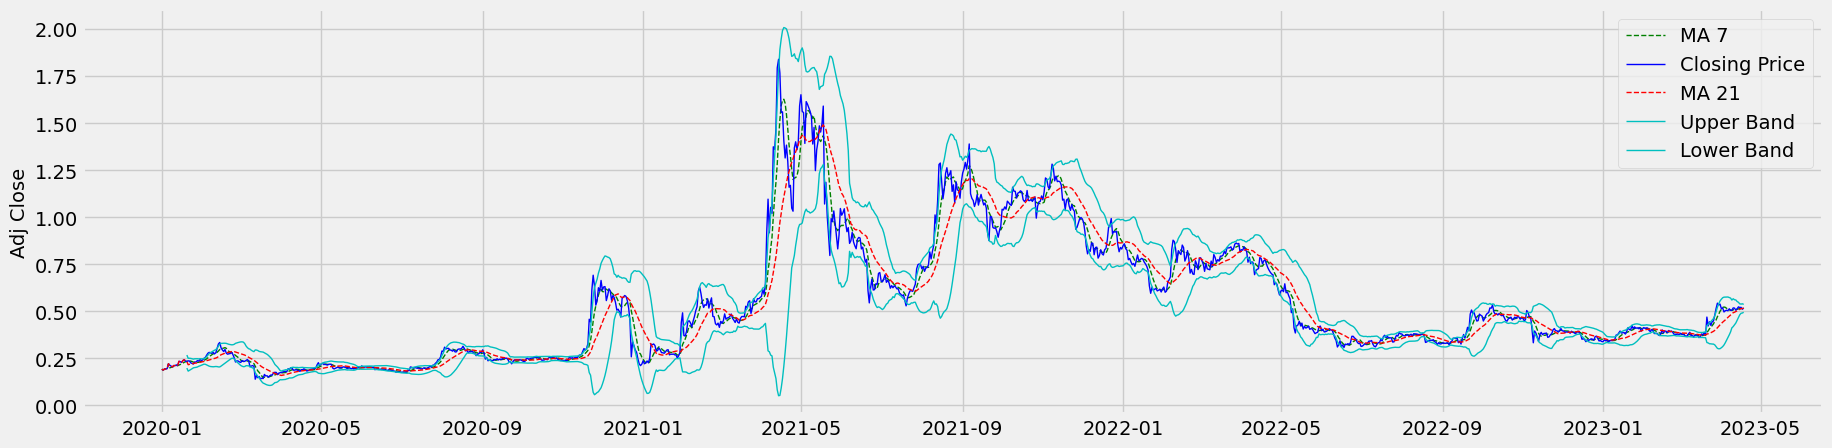

In [31]:
 # Plot first subplot
plt.figure(figsize=(20, 5))
plt.plot(df['MA7', 'XRP-USD'], label='MA 7', color='g', linestyle='--', linewidth=1.0)
plt.plot(df['Adj Close', 'XRP-USD'], label='Closing Price', color='b', linewidth=1.0)
plt.plot(df['MA21', 'XRP-USD'], label='MA 21', color='r', linestyle='--', linewidth=1.0)
plt.plot(df['upper_band', 'XRP-USD'], label='Upper Band', color='c', linewidth=1.0)
plt.plot(df['lower_band', 'XRP-USD'], label='Lower Band', color='c', linewidth=1.0)
plt.ylabel('Adj Close')
plt.legend()


In [78]:
data = df.loc[:, ['Adj Close','Volume', 'MA7', 'MA21', 'MACD', '20SD', 'EMA', 'logmomentum']]
#levels = df.columns.get_level_values(0)[cols]
data.shape

(1204, 312)

In [79]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for RNN, using the past 60 day stock price
FUTURE_PERIOD_PREDICT = 10 # days, how far into the future are we trying to predict?
COIN_TO_PREDICT =  'ADA-USD'

In [80]:
data['future'] = data['Adj Close', COIN_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
data

Adj Close                                                       \
             ADA-USD  ALGO-USD  ANKR-USD   ATOM-USD   BAT-USD     BCH-USD   
Date                                                                        
2020-01-01  0.033458  0.219938  0.001446   4.380158  0.196129  204.397537   
2020-01-02  0.032751  0.213518  0.001397   4.091817  0.183821  195.698563   
2020-01-03  0.034180  0.228098  0.001416   4.247897  0.187701  222.412979   
2020-01-04  0.034595  0.236382  0.001430   4.286356  0.189891  226.018692   
2020-01-05  0.034721  0.231657  0.001418   4.231877  0.188898  224.096527   
...              ...       ...       ...        ...       ...         ...   
2023-04-14  0.438330  0.227652  0.036314  12.262309  0.286126  132.494904   
2023-04-15  0.453280  0.232241  0.037160  12.394587  0.285833  132.805786   
2023-04-16  0.451755  0.234859  0.037015  12.697115  0.288967  134.453751   
2023-04-17  0.434167  0.220693  0.036002  12.341851  0.278806  131.615753   
2023-04-18  0.439820  0.220725  0.036835  12.461351  0.279565  132.450699   

                                                       ... logmomentum  \
               BNB-USD   CHZ-USD   CRO-USD   DASH-USD  ...   THETA-USD   
Date                                                   ...               
2020-01-01   13.689083  0.006654  0.033973  41.865791  ...   -2.430839   
2020-01-02   13.027011  0.006654  0.032858  40.223259  ...   -2.453117   
2020-01-03   13.660452  0.007224  0.034666  44.021961  ...   -2.425069   
2020-01-04   13.891512  0.007601  0.034689  46.451866  ...   -2.356566   
2020-01-05   14.111019  0.007661  0.034618  51.479233  ...   -2.350841   
...                ...       ...       ...        ...  ...         ...   
2023-04-14  329.173859  0.134127  0.070591  60.007286  ...    0.118777   
2023-04-15  333.407288  0.133416  0.071222  59.756329  ...    0.123577   
2023-04-16  348.220917  0.138526  0.072558  61.049778  ...    0.126809   
2023-04-17  339.994110  0.135578  0.069947  58.456722  ...    0.109892   
2023-04-18  341.799561  0.136012  0.072042  59.242516  ...    0.185695   

                                                                        \
             TRX-USD  TUSD-USD   VET-USD   XEM-USD   XLM-USD   XMR-USD   
Date                                                                     
2020-01-01 -4.250998  0.003072 -5.056627 -3.391802 -3.069357  3.823291   
2020-01-02 -4.278027  0.001521 -5.099958 -3.413918 -3.098607  3.823202   
2020-01-03 -4.238099  0.007658 -5.061508 -3.407527 -3.074040  3.933648   
2020-01-04 -4.232159  0.011331 -5.009686 -3.408524 -3.051837  3.922719   
2020-01-05 -4.225160  0.010529 -5.035338 -3.400308 -3.071340  3.990795   
...              ...       ...       ...       ...       ...       ...   
2023-04-14 -2.699219  0.001227 -3.617192 -3.131186 -2.225041  5.088340   
2023-04-15 -2.703048  0.001101 -3.621595 -3.138656 -2.229316  5.090750   
2023-04-16 -2.694858  0.001304 -3.604318 -3.131644 -2.221429  5.097533   
2023-04-17 -2.706292  0.001005 -3.632197 -3.168587 -2.253081  5.072440   
2023-04-18 -2.695180  0.000699 -3.609026 -3.153157 -2.248012  5.083441   

                                  future  
             XRP-USD   ZEC-USD            
Date                                      
2020-01-01 -1.641615  3.334030  0.036825  
2020-01-02 -1.665781  3.300237  0.037690  
2020-01-03 -1.637215  3.354095  0.036966  
2020-01-04 -1.632937  3.409155  0.041660  
2020-01-05 -1.626905  3.434705  0.042553  
...              ...       ...       ...  
2023-04-14 -0.644370  3.742068       NaN  
2023-04-15 -0.651153  3.759480       NaN  
2023-04-16 -0.649337  3.753303       NaN  
2023-04-17 -0.669183  3.727003       NaN  
2023-04-18 -0.654486  3.746284       NaN  

[1204 rows x 313 columns]

In [81]:
dataset = data.values

In [82]:
y= np.array(data['future'])[:-FUTURE_PERIOD_PREDICT]
len(y)

1194

In [83]:
X_1=data.drop(['future'],axis =1)
X= np.array(X_1[X_1.columns])
X= X[:len(X_1)-FUTURE_PERIOD_PREDICT]
X.shape

(1194, 312)

In [84]:
import math
training_data_len = math.ceil(len(dataset)*.8)
X_train = X[:training_data_len] 
X_test = X[training_data_len:]
len(X_test)

230

In [85]:
len(X_train)

964

In [86]:
#scale the data
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train)

X_test_sc=min_max_scaler.fit_transform(X_test)

In [87]:
y_train = y[:training_data_len] 
y_test = y[training_data_len:]
len(y_test)

230

In [88]:
scaler = MinMaxScaler()
y_train_sc = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_sc = scaler.fit_transform(y_test.reshape(-1, 1))

In [89]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [90]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [36]:
baseline = DummyRegressor(strategy='mean').fit(X_train_sc, y_train_sc)
report_metrics(baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'baseline')

In [34]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

In [94]:
from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [35]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
#         LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time',  'test_neg_mean_absolute_error','test_r2','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_absolute_error','r2','neg_mean_squared_error'],
            cv=50,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

In [ ]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'test_neg_mean_absolute_error','test_r2','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_absolute_error','r2','neg_mean_squared_error'],
            cv=50,
            n_jobs=-1,)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)